In [15]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, concatenate
from tensorflow.keras import Input

seq_model = Sequential()
seq_model.add(Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10,activation='softmax'))

seq_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 함수형 api

input_tensor = Input(shape=(64,))
x = Dense(32, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(10,activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


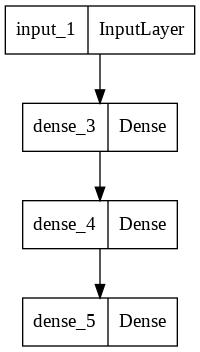

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model)

- MNIST 이미지 데이터 로드하고 벡터로 재구성
- 데이터에 모델을 맞추고
- 테스트 데이터에서 모델 평가

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [6]:
inputs = keras.Input(shape=(784,), name='digits')
x = Dense(64, activation='relu', name='dense_1')(inputs)
x = Dense(64, activation='relu', name='dense_2')(x)
outputs = Dense(10,activation='softmax', name='predictions')(x)

model = Model(inputs=inputs, outputs=outputs)

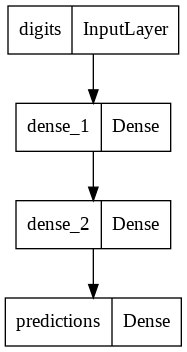

In [12]:
plot_model(model)

In [8]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

CategoricalCrossentropy vs SparseCategoricalCrossentropy
- 훈련 데이터의 label(target)이 one-hot vector 이면 CategoricalCrossentropy
- 훈련 데이터의 label(target)이 정수이면 SparseCategoricalCrossentropy


In [9]:
# 훈련 구성
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [10]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    validation_data=(x_val,y_val)
)

Epoch 1/2
782/782 [==============================] - 5s 3ms/step - loss: 0.3492 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.2151 - val_sparse_categorical_accuracy: 0.9362
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.1683 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.1640 - val_sparse_categorical_accuracy: 0.9526


In [11]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1642 - sparse_categorical_accuracy: 0.9519


In [20]:
# 다중 입력모델

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,),
                   dtype='int32',
                   name='text')
embedded_text = Embedding(
    text_vocabulary_size,64)(text_input)

encoded_text = LSTM(32)(embedded_text)

question_input = Input(shape=(None,),
                       dtype = 'int32',
                       name='question')
embedded_question = Embedding(
    question_vocabulary_size,32)(question_input)
encoded_question = LSTM(16)(embedded_question)

concatenated = concatenate([encoded_text, encoded_question], axis=-1)
# axis = -1은 가장 낮은 차원 뒤쪽에서부터 시작. 자료가 2차원이고 axis=-1이면 1차원에서 붙이라는 의미

answer = Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input,question_input], answer)
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['acc'])


[과제] 입력이 2개인 모델에 대하여 훈련을 수행하세요.
- num_samples = 1000, max_length = 100

다중모델 출력
- 소설 미디어에서 익명 사용자의 포스트를 입력으로 받아 그 사람의 나이, 성별, 소득 수준 등을 예측

In [21]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense
vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = Embedding(vocabulary_size,256)(posts_input)
x = Conv1D(128,5,activation='relu')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(1,name='age')(x)
income_prediction = Dense(num_income_groups,activation='softmax',name='income')(x)
gender_prediction = Dense(1, activation='sigmoid',name='gender')(x)

model = Model(posts_input,[age_prediction, income_prediction, gender_prediction])

model.compile(optimizer = 'rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])


In [ ]:
model.fit(posts, [ate_targets, income_targets, gender_targets], epochs=10,batch_size=64)